<a href="https://colab.research.google.com/github/rsydn9/cvkdu_dg/blob/main/FasterViT_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FasterViT Testing on Google Colab**

In [1]:
!pip install fastervit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.7/165.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.1 MB/s eta 0:00:00


In [2]:
from fastervit import create_model

# Define fastervit-0 model with 224 x 224 resolution

model = create_model('faster_vit_0_224',
                          pretrained=True,
                          model_path="/tmp/faster_vit_0.pth.tar")

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 361M/361M [00:07<00:00, 48.5MB/s]


In [6]:
import torch

image = torch.rand(1, 3, 224, 224)
output = model(image) # torch.Size([1, 1000])

print(output.shape)
print(output[:5])

torch.Size([1, 1000])
tensor([[-1.1869e-01, -1.1526e-01, -1.3640e-01, -1.7988e-01, -1.1570e-01,
         -3.6265e-02, -7.9698e-02, -1.9672e-02,  1.8230e-04, -9.0264e-02,
         -1.3184e-01, -2.0944e-01, -1.0750e-01, -9.1226e-02, -1.7664e-01,
         -1.1667e-01, -1.3956e-01, -1.0913e-01, -2.0881e-02, -1.4280e-01,
         -1.3638e-01, -6.9918e-02, -1.3311e-01,  2.5677e-02, -1.9758e-01,
         -2.1571e-01, -2.7510e-02, -1.4665e-01, -1.4956e-01, -4.8368e-02,
         -1.2964e-01, -1.3088e-01, -4.0386e-02, -5.1428e-02, -7.3252e-03,
         -7.3013e-02,  7.8420e-02, -1.6444e-01, -3.4439e-02, -1.4796e-02,
         -9.9271e-02, -1.0739e-01, -1.0718e-01, -7.7638e-02, -3.8434e-02,
         -1.6155e-01, -5.0464e-02, -8.0724e-02, -1.7237e-01, -1.6113e-01,
         -7.8576e-02,  2.8067e-02, -2.2773e-02, -6.4582e-02, -7.6747e-02,
         -1.7235e-01, -1.5035e-01, -2.2272e-01, -1.8674e-02, -3.9179e-02,
          9.8881e-02, -2.0589e-02, -7.1632e-02,  4.1042e-03, -8.5317e-02,
         -5.4134

In [7]:
pred = output.argmax(dim=1)
print(f"Predicted class: {pred}")

Predicted class: tensor([731])


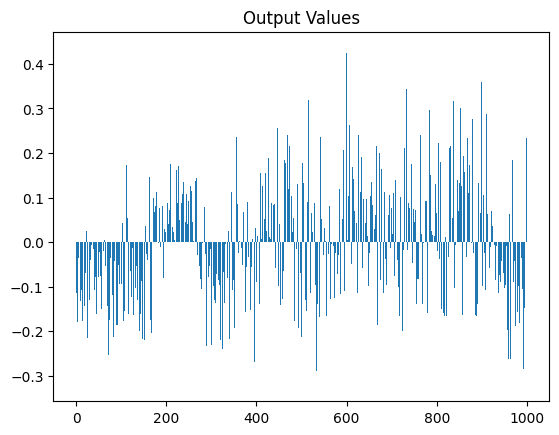

In [9]:
import matplotlib.pyplot as plt

# Detach output from graph to convert to numpy
output = output.detach()

# Plot detached output
plt.bar(torch.arange(len(output[0])), output[0])
plt.title("Output Values")
plt.show()

In [14]:
from fastervit import create_model

# Define any-resolution FasterViT-0 model with 512 x 512 resolution
model = create_model('faster_vit_0_any_res',
                     resolution=[512, 512],
                     window_size=[7, 7, 12, 6],
                     ct_size=2,
                     dim=64,
                     pretrained=True)

The model and loaded state dict do not match exactly

size mismatch for levels.2.blocks.0.pos_embed.relative_bias: copying a param with shape torch.Size([1, 49, 256]) from checkpoint, the shape in current model is torch.Size([1, 144, 256]).
size mismatch for levels.2.blocks.0.attn.pos_emb_funct.relative_coords_table: copying a param with shape torch.Size([1, 13, 13, 2]) from checkpoint, the shape in current model is torch.Size([1, 23, 23, 2]).
size mismatch for levels.2.blocks.0.attn.pos_emb_funct.relative_position_index: copying a param with shape torch.Size([49, 49]) from checkpoint, the shape in current model is torch.Size([144, 144]).
size mismatch for levels.2.blocks.0.attn.pos_emb_funct.relative_bias: copying a param with shape torch.Size([1, 8, 53, 53]) from checkpoint, the shape in current model is torch.Size([1, 8, 148, 148]).
size mismatch for levels.2.blocks.0.hat_attn.pos_emb_funct.relative_coords_table: copying a param with shape torch.Size([1, 7, 7, 2]) from checkpoint, t